In [1]:
from action_reps_control import ActionableRep
import torch
from torch import Tensor
import matplotlib.pyplot as plt

/home/tomasruiz/code/thesis/env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/tomasruiz/code/thesis/env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/tomasruiz/code/thesis/env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/tomasruiz/code/thesis/env/lib/python3.6/site-pack

In [2]:
phi = ActionableRep(2)
phi.load_state_dict(torch.load("arc.pt"))
phi.eval()

ActionableRep(
  (layers): Sequential(
    (0): Linear(in_features=2, out_features=128, bias=True)
    (1): LeakyReLU(negative_slope=0.01)
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): LeakyReLU(negative_slope=0.01)
    (4): Linear(in_features=128, out_features=128, bias=True)
    (5): LeakyReLU(negative_slope=0.01)
    (6): Linear(in_features=128, out_features=128, bias=True)
    (7): LeakyReLU(negative_slope=0.01)
    (8): Linear(in_features=128, out_features=2, bias=True)
  )
)

In [3]:
xlims, ylims = phi(Tensor([[-1, -1], [1, 1]])).T.detach()

<IPython.core.display.Javascript object>


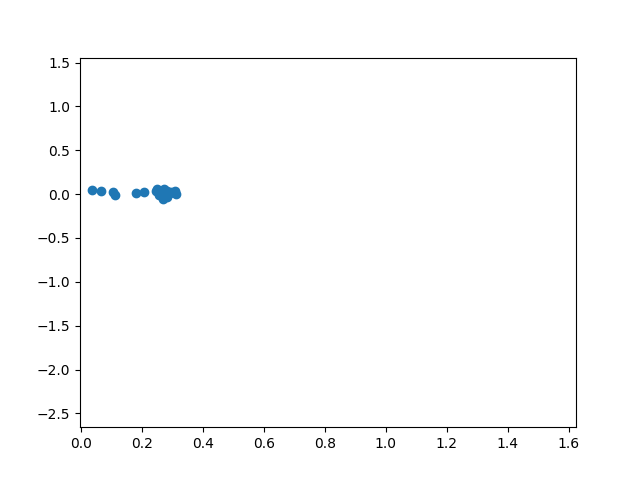

interactive(children=(FloatSlider(value=0.0, description='x1', max=1.0, min=-1.0, step=0.01), FloatSlider(valu…

In [7]:
%matplotlib notebook
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
num_pts = 20
line = ax.scatter([1]*num_pts, [1]*num_pts)
plt.xlim(sorted(xlims)); plt.ylim(sorted(ylims))


def update(x1 = (-1.0, 1.0, 0.01), x2 = (-1.0, 1.0, 0.01)):
    noisy_x = torch.randn(num_pts, 2)*0.05 + Tensor([x1, x2])
    o = phi(noisy_x).detach()
    line.set_offsets(o)
    fig.canvas.draw_idle()

interact(update);

In [8]:
def phi_dist(pos1, pos2):
    return torch.dist(*phi(Tensor([pos1, pos2])).detach())

In [9]:
import matplotlib as mpl

<IPython.core.display.Javascript object>


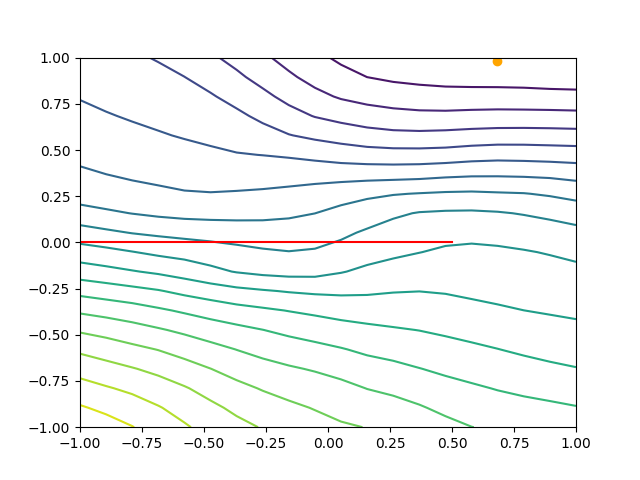

interactive(children=(FloatSlider(value=-0.010000000000000009, description='x1', max=1.0, min=-1.0, step=0.03)…

<function __main__.update(x1=(-1.0, 1.0, 0.03), x2=(-1.0, 1.0, 0.03))>

In [10]:
wall = np.array([[-1, 0], [0.5, 0]])
fig, ax = plt.subplots()
pc = ax.scatter([], [], c="orange")
ax.plot(*wall.T, c="red")
space2d = np.mgrid[-1:1:20j, -1:1:20j]
levels = 20
cmap = mpl.cm.viridis
p = []

def update(x1 = (-1.0, 1.0, 0.03), x2 = (-1.0, 1.0, 0.03)):
    p1 = np.array([x1, x2])
    dists = np.array([phi_dist(p1, p2).numpy() for p2 in space2d.reshape((2, -1)).T])
    print(dists.shape)
    if len(p) > 0:
        for tp in p[0].collections:
            tp.remove()
    p.clear()
    p.append(ax.contour(*space2d, dists.reshape((20, 20)), levels, cmap=cmap))
    pc.set_offsets([x1, x2])

interact(update)